-------------
k-means
-------
Ushbu amaliyotda biz tasodifiy nuqtalar yaratamiz va bu nuqtalarni klasterlaymiz. Maqsad: klasterlash algoritmi qanday ishlashini ko'rish:

In [175]:
import random 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
%matplotlib inline

Tasodifiy nuqtalar klasterini yaratish uchun **make_blobs** funksiyasidan foydalanamiz. Bu funksiya quyidagi parametrlarni qabul qiladi:

    `n_samples` - grafikdsgi nuqtalar soni
    `centers` - Shu nuqtalarni markazini koordinatalari
    `cluster_std` - bu esa shu bosh nuqtalarni uzoqlashishi

In [176]:
np.random.seed(0)
centroids = [[4,4], [4, -3], [-3, 4], [0, 0]]
X, Y = make_blobs(n_samples=7000, centers=centroids, cluster_std=0.9)

Shu biz yaratgan (x,y) koordinatali nuqtalarni `X` va `Y` larga saqlab shu qiymatlarni endi grafigini chiqaramiz

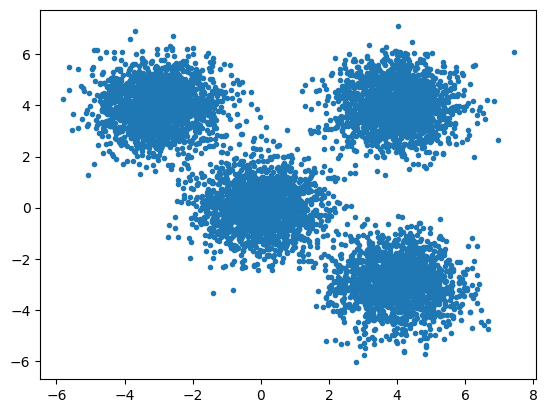

In [177]:
plt.scatter(X[:, 0], X[:, 1], marker='.')
plt.show()

``K-means`` algoritmi 

    `init` - ni vazifasi sentrodilarni tanlash usuli (k-means++ yoki random)
    `n_clusters` - klasterlar soni, ya'ni nechta nuqtada doira sifat qilib to'plansin...
    `n_init` - algoritmni necha marta ishga tushirish (turli sentroidlar bilan qayta-qayta ishga tushirib, modelni qurishni boshlash uchun eng yaxshi sentroidlar tanlanadi)
    

In [178]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 'auto')

Modelni o'qitamiz

In [179]:
k_means.fit(X)

KMeans(n_clusters=3)

Klaster raqami

In [180]:
k_means.labels_

array([0, 1, 2, ..., 2, 2, 0])

Klaster markazlari

In [181]:
k_means.cluster_centers_

array([[ 3.93415402,  3.97592539],
       [-1.8472018 ,  2.35982195],
       [ 3.40111643, -2.57849405]])

Algoritm topgan klaster markazlarini, biz avvaldan bergan markazlar bilan solishtiramiz:

In [182]:
print(centroids)

[[4, 4], [4, -3], [-3, 4], [0, 0]]


In [183]:
# print(np.round(k_means.cluster_centers_))

Endi grafigini chizamiz

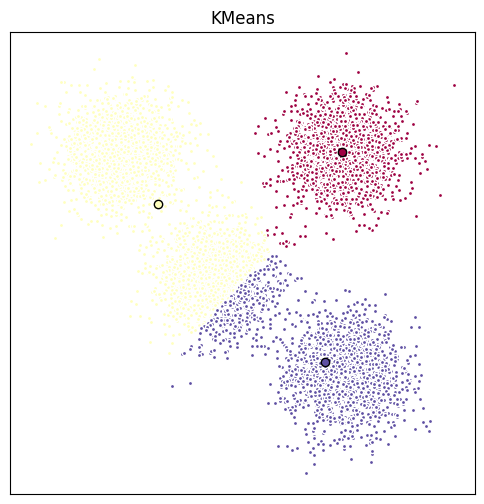

In [184]:
fig = plt.figure(figsize=(6,6))  # grafik o'lchami
# Har bir klaster uchun alohida rang
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means.labels_))))
ax = fig.add_subplot(1, 1, 1)

for k, col in zip(range(len([[3,3], [-3, -2], [2, -3], [0, 0]])), colors):

    # Barcha ma'lumotlar nuqtalari ro'yxatini yarating, ular joylashgan ma'lumotlar nuqtalari
    # (masalan, 0 klaster) rost deb belgilangan, aks holda ular
    # noto'g'ri deb belgilangan.
    my_members = (k_means.labels_ == k)
    
    # Markaz yoki klaster markazini aniqlang.
    cluster_center = k_means.cluster_centers_[k]
    
    # Rangli rang bilan ma'lumotlar nuqtalarini chizadi.
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    
    # Belgilangan rang bilan, ammo quyuqroq kontur bilan markazlarni chizadi
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

# grafikka nom beradi
ax.set_title('KMeans')

# X o'qi belgilarini olib tashlang
ax.set_xticks(())

# Y o'qi belgilarini olib tashlang
ax.set_yticks(())

# ortiqcha kodlarni olib tashlaydi
plt.show()